<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2020/sem08/real_expect.png" width="500">

# Андан на экономе: домашнее задание 4
</center>


> Если орел, я выиграла. Если решка, ты проиграл.

$\qquad$ $\qquad$ $\qquad$ $\qquad$  **[Рейчел из Друзей](https://www.youtube.com/watch?v=TV9ghItJ2Ms)**

**ФИО:**

## Общая информация

__Дата выдачи:__ 20.05.2024

__Дедлайн:__ 23:59MSK 10.06.2024

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

## Формат сдачи

Сам ноутбук называйте в формате hw-02-USERNAME.ipynb, где USERNAME — ваши фамилия и имя на латинице. Задание сдаётся в anytask.

In [23]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

## Часть 1: обязательная

За эту часть можно получить 100 баллов.

### Задача №1: Лучше найди себе девушку! (15 баллов)

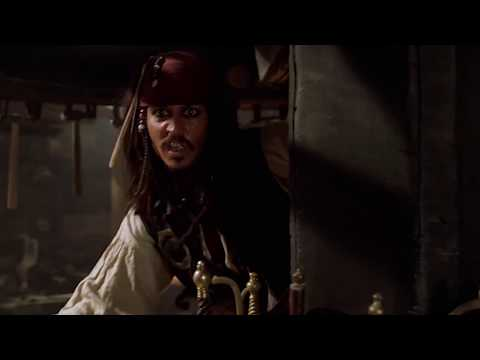

In [24]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZQ0-anIcnzg', width=400, height=320)

В этой задаче вам предстоит проверить несколько гипотез на датасете из американского сервиса знакомств. Датасет называется `dating_is_hard.csv`

Колонки датасета:
- `age` - возраст
- `is_heavy_drinker` - алкоголизм в булевом виде
- `height` - рост в дюймах
- `sex` - полов может быть только два - f для женщин и m для мужчин.
- `smokes` - зависимость от табака в булевом виде
- `location` - место жительства
- `offspring` - отношение к детям

Для каждого пункта нужно расписать нулевую и альтернативную гипотезу, описать какой именно критерий вы используете, перечислить предпослыки необходимые для его использования, а также вычислить значение статистики и p-value, если это возможно.

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/data/dating_is_hard.csv')
df.head()

,Unnamed: 0,age,is_heavy_drinker,height,sex,smokes,location,offspring
0,uid_1,27,False,64,f,True,san francisco california,no opinion
1,uid_2,38,False,65,f,False,oakland california,wants kids
2,uid_3,31,False,70,m,True,san francisco california,does not have kids
3,uid_4,29,False,66,m,False,martinez california,does not have kids
4,uid_5,30,False,69,m,True,san francisco california,no opinion


__a) [5 баллов]__ Рост в приложениях для знакомств не проверяют, поэтому можно поставить себе любой и никто не узнает. Посмотрим же, врут ли люди о своём росте.

Проверьте две гипотезы: совпадает ли средний рост мужчин в приложении с их реальным средним ростом и совпадает ли средний рост женщин в приложении с их реальным средним ростом

__P.S.__ Средний рост мы вам не дамим. Ищите сами и приложите ссылку на источник в решении.

Ссылка на данные о среднем росте американцев на 2024 год: https://worldpopulationreview.com/state-rankings/average-height-by-state


Средний рост мужчин: 5 feet 9 inches = 69 дюймов

Средний рост женщин: 5 feet 4 inches = 64 дюйма

In [26]:
men_heights = df[df['sex'] == 'm']['height']
women_heights = df[df['sex'] == 'f']['height']

print(f"Средний рост мужчин в приложении: {men_heights.mean():.2f} дюймов")

print(f"\nСредний рост женщин в приложении: {women_heights.mean():.2f} дюйма")

Средний рост мужчин в приложении: 70.30 дюймов

Средний рост женщин в приложении: 64.83 дюйма


__Вывод:__ Средний рост двух полов из статистических данных достаточно близок к среднему росту данных из приложения. Однако по данным из приложения всё же пользователи, вероятно, завышают свой рост (разница со статистическими данными в случае мужского пола составила 1,3 дюйма, а с женским полом разница составила 0,83 дюйма).

__б) [5 баллов]__ По моим наблюдениям (состоящим из одного человека) мужчин-алкоголиков гораздо больше женщин. В нашем датасете алкоголизмом мы будем считать параметр `is_heavy_drinker`

Проверьте гипотезу: Действительно ли доля мужчин-алкоголиков выше доли женщин-алкоголиков?

In [27]:
men = df[df['sex'] == 'm']
women = df[df['sex'] == 'f']

men_heavy_drinkers = men['is_heavy_drinker'].mean()
women_heavy_drinkers = women['is_heavy_drinker'].mean()

print(f"Доля мужчин-алкоголиков: {men_heavy_drinkers:.4f}")
print(f"Доля женщин-алкоголиков: {women_heavy_drinkers:.4f}")

Доля мужчин-алкоголиков: 0.0850
Доля женщин-алкоголиков: 0.0775


__Вывод:__ Да, действительно доля мужчин-алкоголиков выше доли женщин-алкоголиков.

__в) [5 баллов]__ Мой друг Володька решил бросить курить и теперь курит только когда пьёт. Это навело меня на мысль о том, что курение привлекает алкоголиков сильнее, чем обычных людей.

Проверьте гипотезу: Действительно ли алкоголики больше склонны к курению, чем неалкоголики?

In [28]:
heavy_drinkers = df[df['is_heavy_drinker'] == True]
non_heavy_drinkers = df[df['is_heavy_drinker'] == False]

heavy_drinkers_smoking_rate = heavy_drinkers['smokes'].mean()
non_heavy_drinkers_smoking_rate = non_heavy_drinkers['smokes'].mean()

print(f"Доля курильщиков среди алкоголиков: {heavy_drinkers_smoking_rate:.4f}")
print(f"Доля курильщиков среди неалкоголиков: {non_heavy_drinkers_smoking_rate:.4f}")

Доля курильщиков среди алкоголиков: 0.4268
Доля курильщиков среди неалкоголиков: 0.3889


**Вывод:** Да, действительно алкоголики больше склонны к курению, чем неалкоголики.

### Задача №2: Глаза и волосья (20 баллов)

 <img alt="Dark" src="img4.png" width=300, align = "center">

Учеными уже доказано, что цвет волос и глаз передается наследственно: генетически моно объянить от 61\% до 100\% вариации в этих показателях. В [исследовании](https://www.cambridge.org/core/journals/twin-research-and-human-genetics/article/genetic-overlap-between-hair-and-eye-color/FA37E967F280E4B313B171A326AAFBB3#article) решили определить, какие факторы, помимо гена пигментации (меланина), могут влиять на внешний вид людей. Эксперимент проводился в Нидерландах и данные о нем можно найти в файле dataTask2.csv).

Вам предстоит проанализровать зависимость двух показателей, располагающихся в соответсвующих колонках:

1. Цвет волос (`HairColor`)
- `Blond`
- `Red`
- `Brown`
- `Black`

2. Цвет глаз (`EyeColor`)

- `Brown`
- `Grey`
- `Green`
- `Green brown`


In [29]:
df = pd.read_csv("https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/data/data_hair_eye.csv", index_col = "Index")
df.head()

,EyeColor,HairColor
Index,,
0,Brown,Blond
1,Brown,Blond
2,Brown,Blond
3,Brown,Blond
4,Brown,Blond


**a) [3 балла]**. Вы имеете дело с "длинным" форматом данных, то есть каждой строке соответсвует одно наблюдение, а каждой колонке - отдельынй показатель. Теперь вам предстоит это изменить - перевести данные в формат таблицы сопряженности. Вспомнить ее вы можете из курса матстата, однако дополнительно можно почитать [здесь](https://mathworld.wolfram.com/ContingencyTable.html). Переведите данные в формат `contingency table`.

In [30]:
contingency_table = pd.crosstab(df['HairColor'], df['EyeColor'])
print(contingency_table)

EyeColor     Blue  Brown    Gray  Green brown
HairColor                                    
Black        4428  11758    4653         4682
Blond      155040  37102  121157        35517
Brown       21970  31791   22294        16763
Red          4595   1671    4000         1493


**б) [3 балла]**. Далее необходимо проанализировать данные. Выведите самый популярный цвет волос и самый популярный цвет глаз в выборке. Также выведите выборочные вероятностьи встретить эти характеристки в категориях, где они занимают наименьшую долю (в цветах глаз и в цветах волос соответственно).

Интерпретируйте результаты относительно страны, в которой проводилось исследование.

In [31]:
mp_hair = contingency_table.sum(axis=1).idxmax()
lp_hair = contingency_table.sum(axis=1).idxmin()
mp_eye = contingency_table.sum(axis=0).idxmax()
lp_eye = contingency_table.sum(axis=0).idxmin()

prob_mp_hair_lp_eye = contingency_table.loc[mp_hair, lp_eye] / contingency_table[lp_eye].sum()
prob_mp_eye_lp_hair = contingency_table.loc[lp_hair, mp_eye] / contingency_table.loc[lp_hair].sum()

print(f"Самый популярный цвет волос: {mp_hair}")
print(f"Самый популярный цвет глаз: {mp_eye}")
print(f"Вероятность встретить самый популярный цвет волос ({mp_hair}) среди людей с наименее популярным цветом глаз ({lp_eye}): {prob_mp_hair_lp_eye:.4f}")
print(f"Вероятность встретить самый популярный цвет глаз ({mp_eye}) среди людей с наименее популярным цветом волос ({lp_hair}): {prob_mp_eye_lp_hair:.4f}")

Самый популярный цвет волос: Blond
Самый популярный цвет глаз: Blue
Вероятность встретить самый популярный цвет волос (Blond) среди людей с наименее популярным цветом глаз (Green brown): 0.6076
Вероятность встретить самый популярный цвет глаз (Blue) среди людей с наименее популярным цветом волос (Red): 0.3908


**Вывод:** Светлые волосы являются типичной чертой жителей северной Европы, и Нидерланды этому не исключение, по нашим данным Blond лидирует. Голубые глаза также присущи генотипу, проживающему в северной Европы. Голубые глаза доминируют в выборке, что соответствует распространенности этого цвета глаз среди местного населения.

Менее распространенные комбинации, такие как блондинистые волосы с зелёно-карим цветом глаз и голубые глаза с рыжими волосами. Однако, эти комбинации также присутствуют, что указывает на генетическое разнообразие в популяции.

**в) [3 балла]**. Визуализируйте распределение цветов глаз для каждого цвета волос. Попробуйте воспользоваться функцией [`mosaic()`](https://www.statsmodels.org/dev/generated/statsmodels.graphics.mosaicplot.mosaic.html), или же обычными столбчатыми графиками

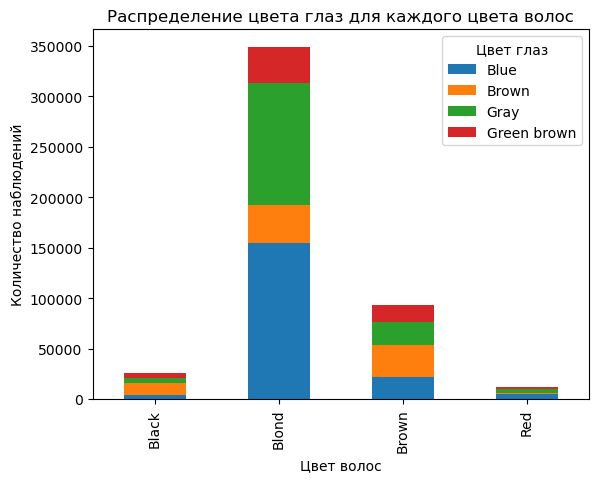

In [32]:
contingency_table.plot(kind='bar', stacked=True)
plt.title('Распределение цвета глаз для каждого цвета волос')
plt.xlabel('Цвет волос')
plt.ylabel('Количество наблюдений')
plt.legend(title='Цвет глаз')
plt.show()

**г) [5 баллов]**. Рассчитайте суммы по столбцам, строкам, а также общую сумму. Рассчитайте тестовую $\chi^2$ для теста на независимость двух переменных. Определите степени свободы у распределения получившеся статистики, найдите критическое значение $\chi^2_{df}$ с помощью встроенной функции `.ppf()`

In [33]:
row_sums = contingency_table.sum(axis=1)
column_sums = contingency_table.sum(axis=0)
total_sum = contingency_table.values.sum()
print(f"Суммы по строкам:\n{row_sums}\n")
print(f"Суммы по столбцам:\n{column_sums}\n")
print(f"Общая сумма: {total_sum}\n")

Суммы по строкам:
HairColor
Black     25521
Blond    348816
Brown     92818
Red       11759
dtype: int64

Суммы по столбцам:
EyeColor
Blue           186033
Brown           82322
Gray           152104
Green brown     58455
dtype: int64

Общая сумма: 478914



In [34]:
from scipy.stats import chi2
expected = np.outer(row_sums, column_sums) / total_sum # ожидаемые частоты

observed = contingency_table.values
chi2_stat = ((observed - expected) ** 2 / expected).sum()

dof = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)

critical_value = chi2.ppf(0.95, dof)

In [35]:
print(f"Тестовая статистика χ2: {chi2_stat:.2f}")
print(f"Степени свободы: {dof}")
print(f"Критическое значение χ2: {critical_value:.2f}")

Тестовая статистика χ2: 57013.66
Степени свободы: 9
Критическое значение χ2: 16.92


*Можете проверить себя, воспользовавшишь функцией `chi2_contingency()`*

Проверка


In [36]:
from scipy.stats import chi2_contingency
chi2_stat_pr, p_value, dof_pr, expected_pr = chi2_contingency(contingency_table)
critical_value_pr = chi2.ppf(0.95, dof_pr)

print(f"Тестовая статистика χ2: {chi2_stat_pr:.2f}")
print(f"Степени свободы: {dof_pr}")
print(f"Критическое значение χ2: {critical_value_pr:.2f}")

Тестовая статистика χ2: 57013.66
Степени свободы: 9
Критическое значение χ2: 16.92


**д) [3 балла]**. Постройте плотность распределения рассчитанной статистики, а найдите p-value точечной оценки, и обозначьте на графике. Также укажите несколько типичных уровней значимости $\alpha$ и нанесите их на график. Проинтерпретируйте результаты.

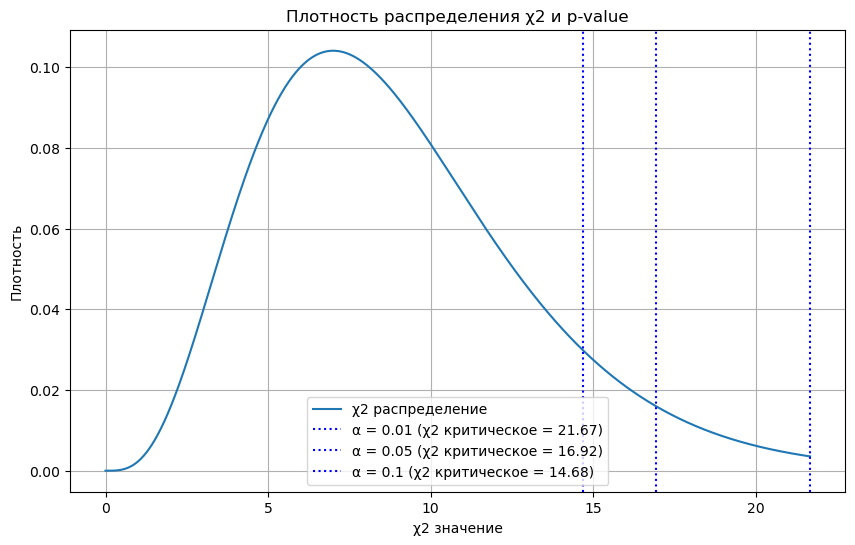

In [37]:
p_value = 1 - chi2.cdf(chi2_stat, dof)
alpha_lvl = [0.01, 0.05, 0.1]
critical_values = [chi2.ppf(1 - alpha, dof) for alpha in alpha_lvl]

x = np.linspace(0, chi2.ppf(0.99, dof), 1000)
y = chi2.pdf(x, dof)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='χ2 распределение')
#plt.axvline(chi2_stat, color='red', linestyle='--', label=f'χ2 статистика = {chi2_stat:.2f}')
#plt.fill_between(x, 0, y, where=(x >= chi2_stat), color='red', alpha=0.3, label=f'p-value = {p_value:.4f}')

for alpha, crit_val in zip(alpha_lvl, critical_values):
    plt.axvline(crit_val, linestyle=':', color='blue', label=f'α = {alpha} (χ2 критическое = {crit_val:.2f})')

plt.title('Плотность распределения χ2 и p-value')
plt.xlabel('χ2 значение')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()

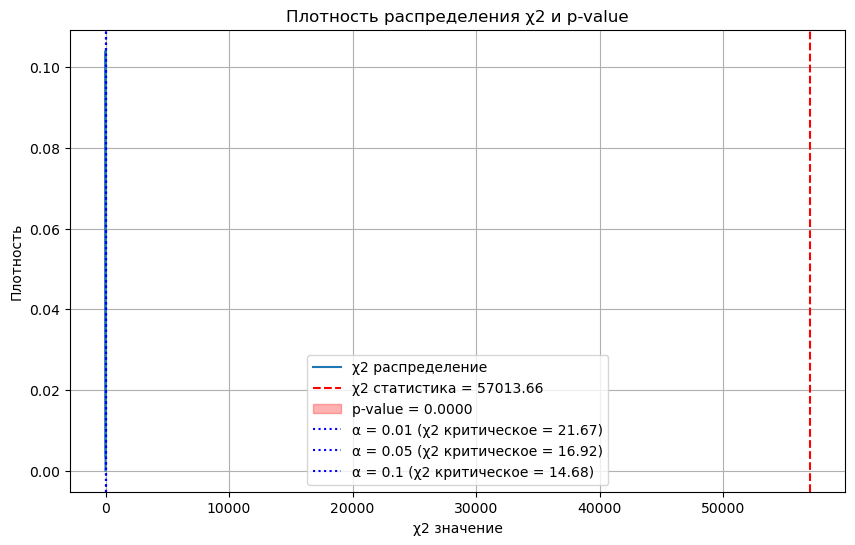

In [38]:
p_value = 1 - chi2.cdf(chi2_stat, dof)
alpha_lvl = [0.01, 0.05, 0.1]
critical_values = [chi2.ppf(1 - alpha, dof) for alpha in alpha_lvl]

x = np.linspace(0, chi2.ppf(0.99, dof), 1000)
y = chi2.pdf(x, dof)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='χ2 распределение')
plt.axvline(chi2_stat, color='red', linestyle='--', label=f'χ2 статистика = {chi2_stat:.2f}')
plt.fill_between(x, 0, y, where=(x >= chi2_stat), color='red', alpha=0.3, label=f'p-value = {p_value:.4f}')

for alpha, crit_val in zip(alpha_lvl, critical_values):
    plt.axvline(crit_val, linestyle=':', color='blue', label=f'α = {alpha} (χ2 критическое = {crit_val:.2f})')

plt.title('Плотность распределения χ2 и p-value')
plt.xlabel('χ2 значение')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()

**Вывод**: Наблюдаемое значение χ2 статистики значительно превышает критические значения для всех указанных уровней значимости α.
p-значение равно нулю, это говорит о том, что наблюдаемое значение χ2 статистики крайне маловероятно при условии истинности нулевой гипотезы.

**е) [3 балла]**. Сделайте финальные выводы и при необходимости дополнительные расчеты, на которых они будут основываться. Есть ли стастистическая взаимосвязь между переменными. И если есть, то чем она может быть объяснена?

**Вывод**: Статистической связи между переменными χ2 распределение и χ2 статистика нет, и p-значение равное нулю нам это доказывает. Значение χ2 статистики сильно кратно превышает значение χ2 распределения.

### Задача №3. Тестируем новый интерфейс страницы отеля  (25 баллов)

Все мы любим отдыхать! А злые корпорации любят наживаться на нашем желании отдыхать.

Представим что вы работаете в одной из таких корпораций и занимаетесь аналитикой сайта для бронирования отелей. Процесс бронирования имеет привычную структуру:
- вбиваете в поиск направленния и даты
- получаете выдачу вариантов отелей
- переходите на страницу отеля
- нажимаете кнопку "забронировать"
- попадаете на страницу оплаты
- оплачиваете

Очевидно, на всех этапах этой воронки вы можете потерять пользователя. Поисследовав поведение пользователей вы решили внести изменения на странице об отеле и хотите чтобы выросла конверсия в бронирования

__а) [3 балла]__ Подумайте, какие изменения могли бы быть внесены?

**Ваш ответ:**

1) Блок со скидками и акциями после 1 шага (вбиваете в поиск направленния и даты).

2) Добавление фильтров и сортировки отелей.

3) Работа над лакониичным, понятным пользователю интерфейсом.

4) Возможность выбирать другой язык.

5) Разные варианты оплаты, как для иностранных карт, так и для российских, а также вариант оплаты по qr-коду Alipay/WeChat для путешественников из Китая.

Перед вами датасет `ab_test.csv`, в нем содержатся данные о пользователях в период теста

`user_id` - уникальный идентификатор пользователя \
`sex` - пол пользователя \
`datetime` - дата и время посещения сайта (начала сессии) \
`district` - регион расположения отеля \
`hotel_page` - был ли пользователь на странице отеля в сессии \
`payment_page` - был ли пользователь на странице оплаты в сессии \
`payment` - была ли произведена оплата в сессии \
`group` - группа в эксперименте

Поскольку изменения вносились на странице отеля нас интересуют именно дошедшие до этой страницы пользователи. Поэтому колонка `hotel_page` принимает значение 1 всегда

In [39]:
df = pd.read_csv("https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/data/ab_simpson.csv")
df.head()

,Unnamed: 0,user_id,sex,datetime,district,hotel_page,payment_page,payment,group
0,0,3326449108867616315,1,11/15/2023 12:02 AM,Южный федеральный округ,1,1,0,control
1,1,7887645543455909870,1,11/02/2023 09:12 PM,Центральный федеральный округ,1,1,0,control
2,2,6148146969124793824,1,11/10/2023 10:06 AM,Центральный федеральный округ,1,1,1,control
3,3,2721602951940155275,0,11/12/2023 07:10 PM,Центральный федеральный округ,1,1,0,control
4,4,1829030712785972138,0,05/01/2024 05:19 AM,Южный федеральный округ,1,0,0,test


__б) [3 балла]__ Сделайте небольшой eda, какие выводы вы можете сделать о данных? Корректно ли проводился аб тест? Найдите ошибки и объясните почему это некорректно.

1) Получение основной информации о каждом столбце.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401807 entries, 0 to 401806
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    401807 non-null  int64 
 1   user_id       401807 non-null  int64 
 2   sex           401807 non-null  int64 
 3   datetime      401807 non-null  object
 4   district      401807 non-null  object
 5   hotel_page    401807 non-null  int64 
 6   payment_page  401807 non-null  int64 
 7   payment       401807 non-null  int64 
 8   group         401807 non-null  object
dtypes: int64(6), object(3)
memory usage: 27.6+ MB


2) Получение статистической информации по каждому столбцу

In [41]:
df.describe(include='all')

,Unnamed: 0,user_id,sex,datetime,district,hotel_page,payment_page,payment,group
count,401807.000000,4.018070e+05,401807.000000,401807,401807,401807.0,401807.000000,401807.000000,401807
unique,NaN,NaN,NaN,34705,7,NaN,NaN,NaN,2
top,NaN,NaN,NaN,05/02/2024 05:51 AM,Южный федеральный округ,NaN,NaN,NaN,test
freq,NaN,NaN,NaN,33,120749,NaN,NaN,NaN,201935
mean,200903.000000,4.615212e+18,0.499994,NaN,NaN,1.0,0.741824,0.292242,NaN
std,115991.834144,2.662886e+18,0.500001,NaN,NaN,0.0,0.437632,0.454794,NaN
min,0.000000,5.888584e+13,0.000000,NaN,NaN,1.0,0.000000,0.000000,NaN
25%,100451.500000,2.309885e+18,0.000000,NaN,NaN,1.0,0.000000,0.000000,NaN
50%,200903.000000,4.610460e+18,0.000000,NaN,NaN,1.0,1.000000,0.000000,NaN
75%,301354.500000,6.923790e+18,1.000000,NaN,NaN,1.0,1.000000,1.000000,NaN


3) Подсчёт количества записей в каждом федеральном округе.

In [42]:
df['district'].value_counts()

Южный федеральный округ              120749
Центральный федеральный округ        120336
Приволжский федеральный округ         60333
Северо-Западный федеральный округ     50071
Уральский федеральный округ           26189
Сибирский федеральный округ           16072
Дальневосточный федеральный округ      8057
Name: district, dtype: int64

In [43]:
df['group'].value_counts(normalize=True)

test       0.502567
control    0.497433
Name: group, dtype: float64

4) Воронка конверсии. Подсчёт количества пользователей, посетивших страницу отеля, перешедших на страницу оплаты и завершивших оплату для 2х групп.

In [44]:
conversion_funnel = df.groupby('group').agg(
    total_users=('user_id', 'count'),
    visited_hotel_page=('hotel_page', 'sum'),
    visited_payment_page=('payment_page', 'sum'),
    completed_payment=('payment', 'sum')
).reset_index()

conversion_funnel

,group,total_users,visited_hotel_page,visited_payment_page,completed_payment
0,control,199872,199872,151303,50002
1,test,201935,201935,146767,67423


5) Проверка временного периода.

In [45]:
df.groupby('group')['datetime'].describe()

,count,unique,top,freq
group,,,,
control,199872,21536,11/13/2023 07:33 PM,25
test,201935,13169,05/02/2024 05:51 AM,33


**Вывод**: Данные не содержат пропусков, однако записи по федеральным округам распределены совсем неравномерно, а также по ниже представленным причинам я могу утверждать, что аб-тест проводился некорректно.

1) Контрольная группа имеет наибольшую частоту записей в ноябре 2023 года, в то время как тестовая группа имеет наибольшую частоту записей в мае 2024 года. Из-за сезонности этот факт влечёт некорректные результаты.

2) Контрольная группа имеет гораздо большее количество уникальных временных меток (21536) по сравнению с тестовой группой (13169). Это снижает достоверность теста.

Раскроем правду. Изменение продукта касалось адаптации страницы отеля под его регион. Например, в южных регионах пользователям на странице отеля предлагались активности для пляжного отдыха, а в северном и центральном регионе сразу подбирались ближайшие экскурсии и так далее.

__в) [5 баллов]__ Проанализируйте, как ведут себя конверсии в страницу оплаты и в оплату в разных регионах? Опишите выводы.

In [46]:
conversion_funnel = df.groupby('district').agg(
    total_users=('user_id', 'count'),
    visited_hotel_page=('hotel_page', 'sum'),
    visited_payment_page=('payment_page', 'sum'),
    completed_payment=('payment', 'sum')
).reset_index()

conversion_funnel['conversion_to_page'] = conversion_funnel['visited_payment_page'] / conversion_funnel['visited_hotel_page']
conversion_funnel['conversion_to_payment'] = conversion_funnel['completed_payment'] / conversion_funnel['visited_payment_page']
conversion_funnel

,district,total_users,visited_hotel_page,visited_payment_page,completed_payment,conversion_to_page,conversion_to_payment
0,Дальневосточный федеральный округ,8057,8057,1412,2492,0.175251,1.764873
1,Приволжский федеральный округ,60333,60333,38017,18205,0.630120,0.478865
2,Северо-Западный федеральный округ,50071,50071,35252,13416,0.704040,0.380574
3,Сибирский федеральный округ,16072,16072,4983,4637,0.310042,0.930564
4,Уральский федеральный округ,26189,26189,11485,8112,0.438543,0.706313
5,Центральный федеральный округ,120336,120336,109514,33426,0.910068,0.305221
6,Южный федеральный округ,120749,120749,97407,37137,0.806690,0.381256


**Вывод**: Результаты неоднозначные, в одних регионах гораздо выше конверсии в страницу оплаты, в других же конверсии в саму оплату. Очень смутил результат ДВФО, как вышло так что оплат прошло больше, чем посещений страниц оплаты - не известно...

__г) [5 баллов]__ Проанализируйте, улучшилась ли воронка для пользователей в тестовой группе по сравнению с контрольной вне зависимости от региона? Опишите выводы.

In [47]:
conversion_funnel_groups = df.groupby('group').agg(
    total_users=('user_id', 'count'),
    visited_hotel_page=('hotel_page', 'sum'),
    visited_payment_page=('payment_page', 'sum'),
    completed_payment=('payment', 'sum')
).reset_index()

conversion_funnel_groups['conversion_to_page'] = conversion_funnel_groups['visited_payment_page'] / conversion_funnel_groups['visited_hotel_page']
conversion_funnel_groups['conversion_to_payment'] = conversion_funnel_groups['completed_payment'] / conversion_funnel_groups['visited_payment_page']

conversion_funnel_groups

,group,total_users,visited_hotel_page,visited_payment_page,completed_payment,conversion_to_page,conversion_to_payment
0,control,199872,199872,151303,50002,0.756999,0.330476
1,test,201935,201935,146767,67423,0.726803,0.459388


**Вывод**: Да, сравнивая значения строк в столбце "conversion_to_payment", значения тестовой группы больше на 40%, несмотря на то, что значения в столбце "conversion_to_page" практически равны.

__д) [5 баллов]__ Проанализируйте распределение интересов пользователей в тестовой и контрольной группе. Какими регионами они интересовались? Изменились ли их предпочтения?

1) Группировка данных по группам эксперимента и регионам.

In [48]:
interest_distribution = df.groupby(['group', 'district']).agg(
    total_users=('user_id', 'count')
).reset_index()

2) Подсчет общего количества пользователей в каждой группе, объединение данных для расчета долей.

In [49]:
total_users_group = df.groupby('group').agg(
    total_users=('user_id', 'count')
).reset_index()

interest_distribution = interest_distribution.merge(total_users_group, on='group', suffixes=('', '_group'))

3) Расчет доли пользователей, интересующихся каждым регионом.

In [50]:
interest_distribution['interest_share'] = interest_distribution['total_users'] / interest_distribution['total_users_group']
interest_distribution

,group,district,total_users,total_users_group,interest_share
0,control,Дальневосточный федеральный округ,1999,199872,0.010001
1,control,Приволжский федеральный округ,23985,199872,0.120002
2,control,Северо-Западный федеральный округ,39974,199872,0.199998
3,control,Сибирский федеральный округ,7994,199872,0.039996
4,control,Уральский федеральный округ,5996,199872,0.029999
5,control,Центральный федеральный округ,79949,199872,0.400001
6,control,Южный федеральный округ,39975,199872,0.200003
7,test,Дальневосточный федеральный округ,6058,201935,0.030000
8,test,Приволжский федеральный округ,36348,201935,0.179999
9,test,Северо-Западный федеральный округ,10097,201935,0.050001


4) Преобразование таблицы в более читаемый вид.

In [51]:
interest_distribution_pivot = interest_distribution.pivot(index='district', columns='group', values='interest_share').reset_index()
interest_distribution_pivot

group,district,control,test
0,Дальневосточный федеральный округ,0.010001,0.030000
1,Приволжский федеральный округ,0.120002,0.179999
2,Северо-Западный федеральный округ,0.199998,0.050001
3,Сибирский федеральный округ,0.039996,0.040003
4,Уральский федеральный округ,0.029999,0.099998
5,Центральный федеральный округ,0.400001,0.200000
6,Южный федеральный округ,0.200003,0.400000


**Вывод**: Предпочтения изменились. В контрольной группе пользователи больше интересовались 1) Центральным, 2) Северо-Западным и 3) Южным федеральными округами. В тестовой же группе Топ 3 ФО по интересу пользователей заняли: 1) Южный, 2) Центральный и 3) Приволжский федеральные округа.

Если вы все сделали правильно, то у вас получился противоречивые ответы в пунктах 3 и 4. Вы попали в ловушку Парадокса Симпсона. Подробнее о нем можно почитать [здесь](https://ru.wikipedia.org/wiki/Парадокс_Симпсона)

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/simpson.jpg?raw=true" width="350" align='center'>

__е) [4 балла]__ Теперь, когда вы все узнали, опишите кратко почему вы получили противоречивый результат в пунктах 3 и 4 (1 балл)

**Ваш ответ:** Причина парадокса заключается в некорректном усреднении двух групп данных с различной долей контрольных наблюдений. Вышло так, что заинтересованных в покупке пользователей меньше, чем пользователей, которые купили тур.

## Задача №4: Не подглядывать! (40 баллов)

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/trump.png?raw=true" width="500" align='left'>

На американских выборах 2020 года в некоторых штатах проходила очень конкурентная борьба между кандидатами. По мере подсчета голосов перевес в голосах склонялся то в пользу демократов, то в пользу республиканцев. И вот, в один из таких моментов, когда чаша весов склонилась в пользу республиканцев, Д. Трамп написал в твиттер "stop the count!", что означало призыв к остановке подсчета голосов.

_Здесь у вас мог возникнуть вопрос, и зачем нам это?_

Ответ очень прост. В этой ситуации всем очевидно, что призыв Трампа не мог быть осуществлен, то есть прерывать подсчет голосов раньше времени кажется довольно глупым способом выявления победителя. И вот абсолютно такой же способ принятия решения есть и в А/Б-тестах, только теперь многим аналитикам он уже кажется не столь очевидным, что приводит к существенным ошибкам в заключении выводов.

_Решив эту задачу, мы познакомимся с такой проблемой подробнее и поймем, как не стоит делать, когда вы запускаете А/Б-тест._

Чтобы понять, в чем же именно заключается проблема, мы с вами будем проводить симуляции А/Б-тестов. Это когда мы генерируем данные уже со знаниями, как эти данные устроены. А затем, запуская процедуру проверки гипотез над такими симулированными данными, мы будем оценивать, что происходит на практике (при запуске А/Б-теста).

На практике же всегда неизвестно, как устроены данные, и проводя А/Б-тест мы пытаемся зафиксировать различия. Еще раз, здесь же мы будем знать об устройстве данных, а затем будем смотреть на поведение А/Б-теста, то есть как будто бы смотреть на тест с обратной стороны.

_Перед тем как идти дальше, остановитесь здесь и еще раз зафиксируйте это!_

__а) [10 баллов]  Подсчет размера выборки для А/Б-теста__

Предположим, что вы хотите провести А/Б-тест внутри вашего приложения. Вы выбрали некоторую метрику $X$ – случайную величину из нормального распределения с мат. ожиданием $100$ у.е. и стандартным отклонением $40$ у.е – это ваш бейзлайн (группа А). Рассчитайте, сколько дней вам нужно крутить такой А/Б-тест, если:

1. Вы ожидаете получить минимальный размер эффекта в $5$ у.е.;
2. Вы хотите зафиксировать ошибку первого рода на уровне $\alpha=5\%$, а ошибку второго рода на уровне $\beta=20\%$;
3. Вы точно знаете, что в группе Б стандартное отклонение метрики составляет также $20$ у.е.
4. Посещаемость вашего приложения ежедневно составляет $200$ пользователей, и вы готовы раскатить тест на $100\%$ трафика.

Формула для расчета числа наблюдений _для одной группы_:

$$
n_{\text{one group}} = \frac{(\sigma_A^2 + \sigma_B^2) \cdot (z_{1-\frac{\alpha}{2}} + z_{1-\beta})^2}{MDE^2},
$$

__Подсказка:__ Помните, что после получения общего числа наблюдений вам нужно выразить это в дни! Вы должны получить целое число. Также будьте аккуратны с подсчетом трафика и кол-ва наблюдений – обратите внимание, со скольким числом групп вы работаете!

In [52]:
from scipy.stats import norm

1) Параметры.

In [53]:
e_a = 100
sigma_A = 40
sigma_B = 20
MDE = 5
a = 0.05
b = 0.2
daily_traffic = 200

2) Z-значения для уровней значимости и мощности.

In [54]:
z_alpha = norm.ppf(1 - a / 2)
z_beta = norm.ppf(1 - b)
print('z_alpha = ', z_alpha)
print('z_beta = ', z_beta)

z_alpha =  1.959963984540054
z_beta =  0.8416212335729143


3) Подсчёт числа наблюдений для одной группы и общего кол-ва наблюдений.

In [55]:
n_one_group = ((sigma_A ** 2 + sigma_B ** 2) * (z_alpha + z_beta) ** 2) / MDE ** 2
n_total = 2 * n_one_group
print('Число наблюдений для 1 группы = ', n_one_group)
print('Общее кол-во наблюдений = ', n_total)

Число наблюдений для 1 группы =  627.9103787479271
Общее кол-во наблюдений =  1255.8207574958542


4)Количество дней для проведения.

In [56]:
test_days = np.ceil(n_total / daily_traffic)
print('Количество дней для проведения = ', test_days)

Количество дней для проведения =  7.0


__б) [20 баллов] Симуляция А/Б-теста__

Теперь нам нужно запустить А/Б-тест. Для этого:

1. Сгенерируйте выборку данных из нормального распределения для группы А и Б в конкретный один день. Считайте, что в группе Б математическое ожидание составляет $105$ у.е., то есть с учетом размера вашего минимального ожидаемого эффекта из предыдущего пункта.

1) Параметры.

In [57]:
e_b = 105
sample_size = 1400

2) Генерация выборок для групп А и Б.

In [58]:
np.random.seed(42)
sample_A = np.random.normal(e_a, sigma_A, sample_size)
sample_B = np.random.normal(e_b, sigma_B, sample_size)

2. Теперь представим, что наш тест был запущен $X$ дней. Напишите функцию, которая за этот период теста собирает в `DataFrame` следующие данные на каждый день теста:
    1. среднее метрики в группе А
    2. среднее метрики в группе Б
    3. p-value, посчитанное с помощью t-test – можно воспользоваться встроенной функцией `scipy.stats.ttest_ind`
    
    Соберите `DataFrame` для $X=50$.
    
__Подсказка:__ Среднее для 1-го дня должно считаться по пользователям, пришедших в первый день, для второго дня – по пользователям, пришедшим в первый и второй день и т.д. То есть накопленным итогом за каждый день теста.

In [59]:
from scipy.stats import ttest_ind
def ab_test_simulation(days, sample_A, sample_B):
    df = pd.DataFrame(columns=['Day', 'Mean_A', 'Mean_B', 'P_value'])
    for day in range(1, days + 1):
        sample_A_day = sample_A[:day * daily_traffic]
        sample_B_day = sample_B[:day * daily_traffic]
        m_A = np.mean(sample_A_day)
        m_B = np.mean(sample_B_day)
        _, p_value = ttest_ind(sample_A_day, sample_B_day, equal_var=False)
        df.loc[day] = [day, m_A, m_B, p_value]
    return df

X = 50
sample_size = 50 * 200
sample_A = np.random.normal(e_a, sigma_A, sample_size)
sample_B = np.random.normal(e_b, sigma_B, sample_size)
ab_test_df = ab_test_simulation(X, sample_A, sample_B)

3. На основе `DataFrame` из предыдущего пункта постройте график динамики среднего в группе А и в группе Б по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится.

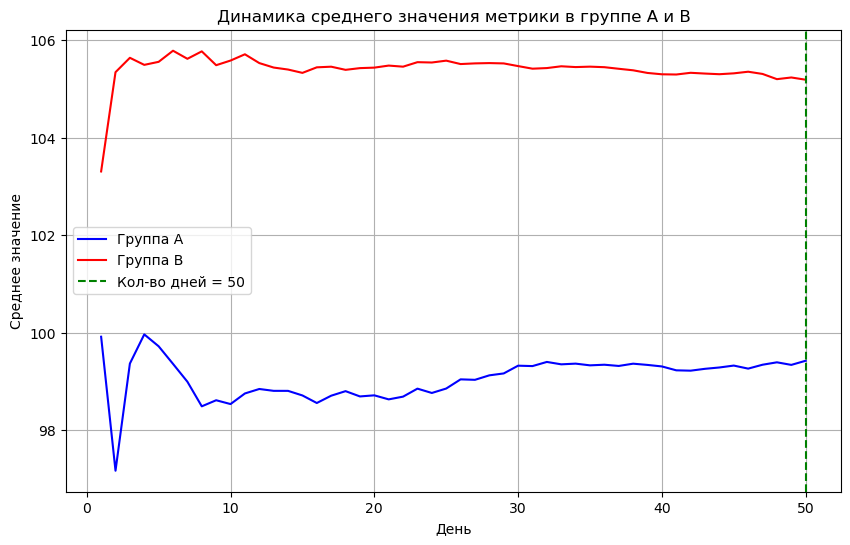

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(ab_test_df['Day'], ab_test_df['Mean_A'], label='Группа A', color='blue')
plt.plot(ab_test_df['Day'], ab_test_df['Mean_B'], label='Группа B', color='red')
plt.xlabel('День')
plt.ylabel('Среднее значение')
plt.title('Динамика среднего значения метрики в группе A и B')
plt.axvline(x=50, linestyle='--', color='green', label='Кол-во дней = 50')
plt.legend()
plt.grid(True)
plt.show()

4. На основе `DataFrame` из предыдущего пункта постройте график динамики p-value по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится. Также отложите горизонтальную линию – ваш уровень значимости $\alpha$.

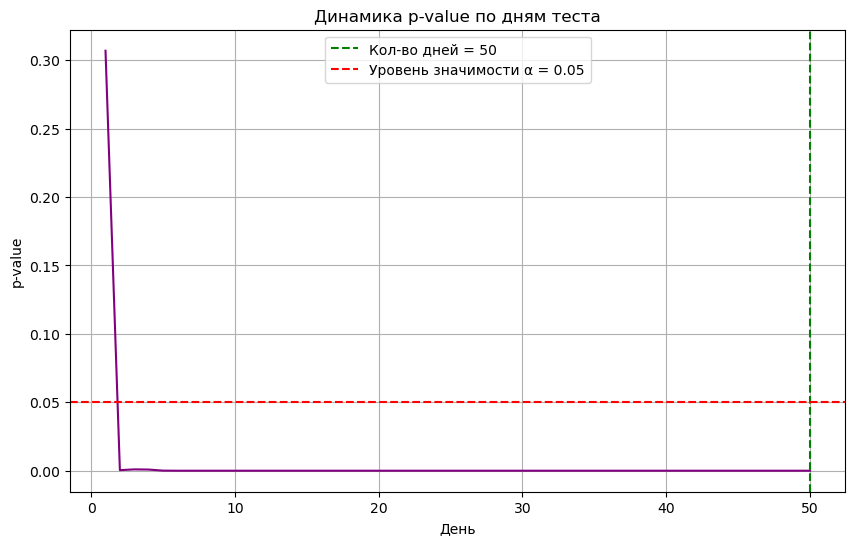

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(ab_test_df['Day'], ab_test_df['P_value'], color='purple')
plt.xlabel('День')
plt.ylabel('p-value')
plt.title('Динамика p-value по дням теста')
plt.axvline(x=X, linestyle='--', color='green', label='Кол-во дней = 50')
plt.axhline(y=a, linestyle='--', color='red', label='Уровень значимости α = 0.05')
plt.legend()
plt.grid(True)
plt.show()

5. Перегенируруйте шаги 2-4 несколько раз, посмотрев на графики. Что вы видите? Что происходит с p-value в периодах:
    1. до кол-ва дней, посчитанных по формуле из п.1
    2. в точке кол-ва дней, посчитанных по формуле из п.1
    3. после кол-ва дней, посчитанных по формуле из п.1
    
    Опишите выводы максимально подробно.

**Вывод**: С каждой новой генерацией график становится интереснее. До 7 дней (кол-во дней, посчитанных по формуле из п.1) значения p-value значительно выделяются, они больше. В точке 7 дней значение p-value становится равным 0 и продолжает быть равным 0 после 7го дня.

6. Теперь предположим, что мы поменяли наш $MDE$ до $1$ у.е. То есть мат. ожидание в группе А осталось по-прежнему $100$, а вот в группе Б теперь $101$. Перегенерируйте пункты 2-4 для измененного $MDE$, при этом кол-во дней в п.1 не пересчитывайте. Что происходит с p-value? Сделайте выводы.

In [62]:
e_B_new = 101
MDE_new = 1

sample_B_new = np.random.normal(e_B_new, sigma_B, sample_size)
ab_test_df_new = ab_test_simulation(X, sample_A, sample_B_new)

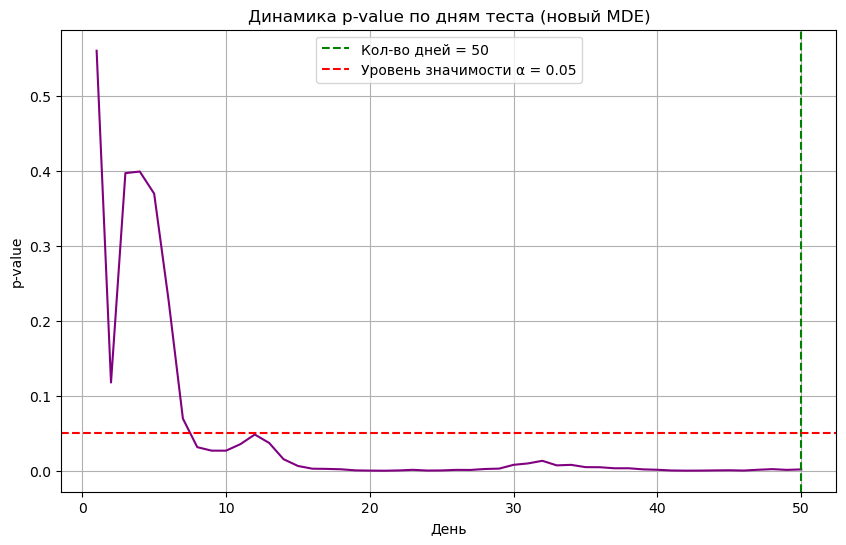

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(ab_test_df_new['Day'], ab_test_df_new['P_value'], color='purple')
plt.xlabel('День')
plt.ylabel('p-value')
plt.title('Динамика p-value по дням теста (новый MDE)')
plt.axvline(x=50, linestyle='--', color='green', label='Кол-во дней = 50')
plt.axhline(y=a, linestyle='--', color='red', label='Уровень значимости α = 0.05')
plt.legend()
plt.grid(True)
plt.show()


**Вывод**: Значения p-value с каждым днём колеблятся и стремятся к 0, разница в 1 и последний день измерений колоссальна.

__в) [10 баллов] Симуляция А/А-теста__

Теперь представим, что изменений на самом деле никаких нету, то есть мат. ожидание в обоих группах $100$, а $MDE = 0$

1. И снова перегенерируйте вышесделанные пункты 2-4. Что происходит с p-value? Может ли оно оказаться ниже уровня значимости?

In [64]:
e = 100
sigma_C = 20

sample_C = np.random.normal(e, sigma_C, sample_size)
ab_test_df_C = ab_test_simulation(X, sample_C, sample_C)

2. Ну и напоследок, напишите функцию, которая генерирует p-value на последний день A/A теста. А затем запустите эту функцию $1000$ раз, собрав $1000$ значений p-value. Постройте гистограмму их распределения. Что вы видите?

__Подсказка:__ Для такой функции достаточно создать выборку один раз, изменив ее размер.

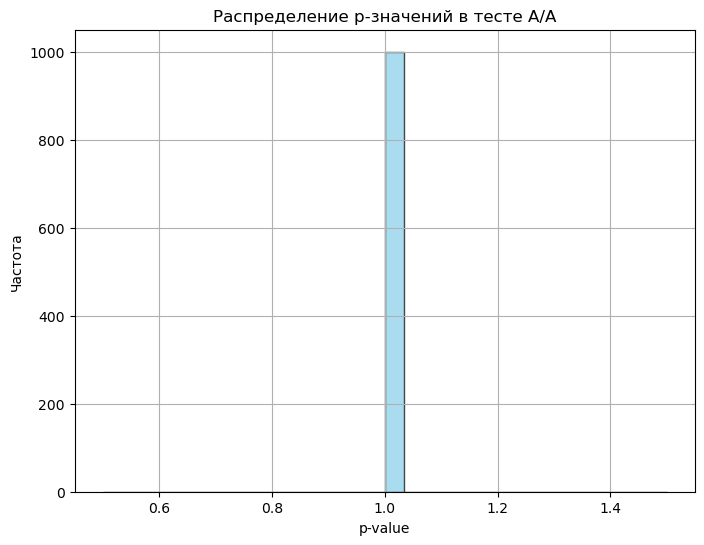

In [65]:
def p_value_simulation_C():
    sample_C = np.random.normal(e, sigma_C, sample_size)

    sample_A_last_day = sample_C[-daily_traffic:]
    sample_B_last_day = sample_C[-daily_traffic:]
    _, p_value = ttest_ind(sample_A_last_day, sample_B_last_day)

    return p_value

p_values_C = [p_value_simulation_C() for _ in range(1000)]

plt.figure(figsize=(8, 6))
plt.hist(p_values_C, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('p-value')
plt.ylabel('Частота')
plt.title('Распределение p-значений в тесте A/A')
plt.grid(True)
plt.show()
